# Spatial Operations in Image Processing
Spatial operations use pixels in a neighborhood to determine the present pixel value. Applications include filtering and sharpening. They are used in many steps in computer vision like segmentation and are a key building block in Artificial Intelligence algorithms.

Linear Filtering<br>
Filtering Noise<br>
Gaussian Blur<br>
Image Sharpening<br>
Edges<br>
Median<br>
Threshold

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

Plot image side by side

In [9]:

def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

Spatial operations use the nanoring pixels to determine the present pixel value

<h2>Linear Filtering</h2>
Filtering involves enhancing an image, for example removing the Noise from an image. Noise is caused by a bad camera or bad image compression. The same factors that cause noise may lead to blurry images, we can apply filters to sharpening these images. Convolution is a standard way to Filter an image the filter is called the kernel and different kernels perform different tasks. In addition, Convolution is used for many of the most advanced artificial intelligence algorithms. We simply take the dot product of the kernel and as an equally-sized portion of the image. We then shift the kernel and repeat.

Consider the following image:

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


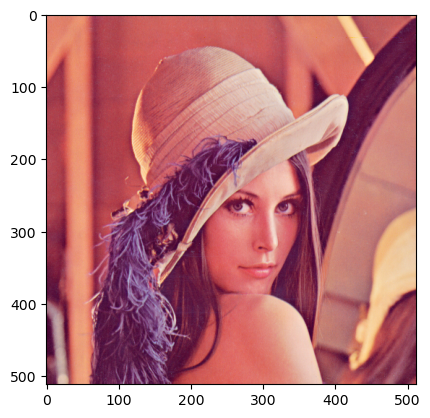

In [10]:
image = cv2.imread("lenna.png")
print(image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

The images we are working with are comprised of RGB values which are values from 0 to 255. Zero means white noise, this makes the image look grainy:

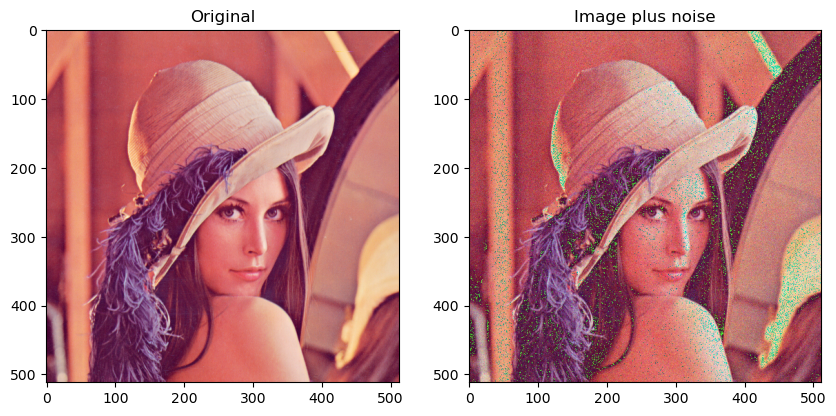

In [11]:
rows, cols, _ = image.shape

# Creates values using a normal distribution with a mean of 0 and standard deviation of 15, the values are converted to unit8 which means the values are between 0 and 255
noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)

noise_image = noise + image

plot_image(image, noise_image, title_1="Original", title_2="Image plus noise")

When adding noise to an image sometimes the value might be greater than 255, in this case, 256, is subtracted from the value to wrap the number around keeping it between 0 and 255. For example, consider an image with an RGB value of 137 and we add noise with an RGB value of 215 we get an RGB value of 352. We then subtract 256, the total number of possible values between 0 and 255, to get a number between 0 and 255.

<h2>Filtering Noise</h2>
Smoothing filters average out the Pixels within a neighborhood, they are sometimes called low pass filters. For mean filtering, the kernel simply averages out the kernels in a neighborhood.

In [12]:
# Create a kernel which is a 6 by 6 array where each value is 1/36
kernel = np.ones((6,6))/36

The function filter2D performs 2D convolution between the image src and the kernel on each color channel independently. The parameter ddepth has to do with the size of the output image, we will set it to -1 so the input and output are the same size.

In [14]:
image_filtered = cv2.filter2D(src = noise_image, ddepth = -1, kernel = kernel)

We can plot the image before and after the filtering; we see the noise is reduced, but the image is blurry:

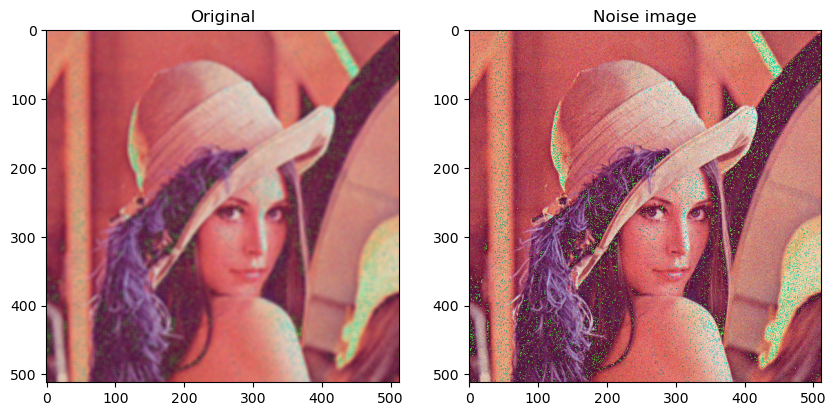

In [15]:
plot_image(image_filtered, noise_image, title_1="Original", title_2="Noise image")

A smaller kernel keeps the image sharp, but filters less noise, here we try a 4x4 kernel

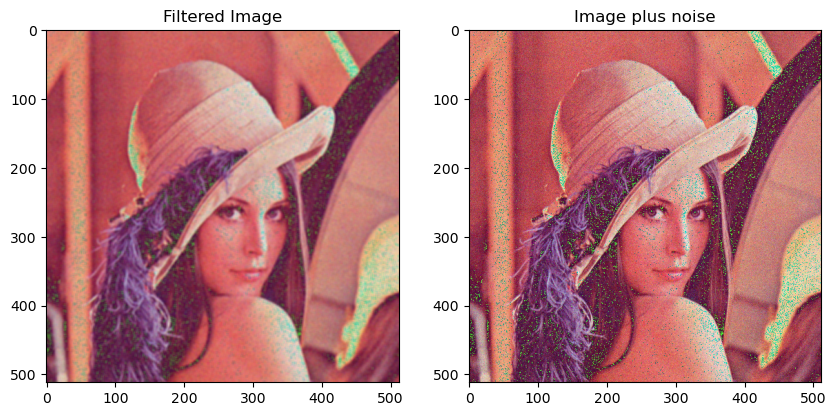

In [16]:
kernel = np.ones((4,4)) / 16
image_filtered = cv2.filter2D(src = noise_image, ddepth = -1, kernel = kernel)

plot_image(image_filtered, noise_image, title_1="Filtered Image", title_2="Image plus noise")

# Gaussian Blur
The function GaussianBlur convolves the source image with the specified Gaussian kernel It filters noise but does a better job of preserving the edges. It has the following parameters:

Parameters

src input image; the image can have any number of channels, which are processed independently<br>

ksize: Gaussian kernel size<br>

sigmaX Gaussian kernel standard deviation in the X direction<br>

sigmaY Gaussian kernel standard deviation in the Y direction; if sigmaY is zero, it is set to be equal to sigmaX

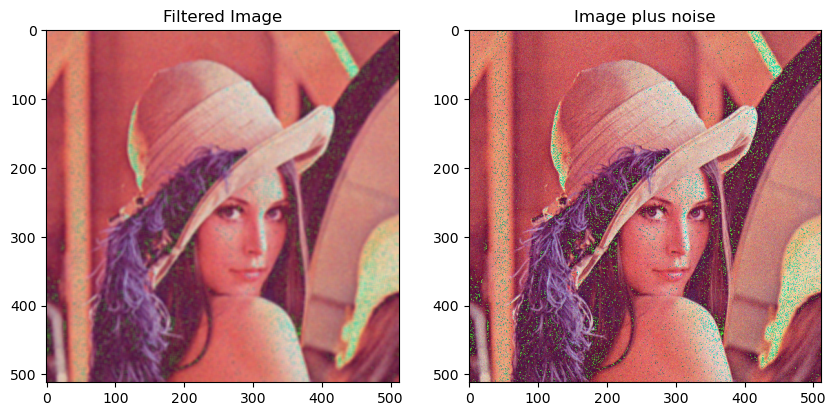

In [17]:
image_filtered = cv2.GaussianBlur(noise_image, (5,5), sigmaX = 4, sigmaY = 4)

plot_image(image_filtered, noise_image, title_1="Filtered Image", title_2="Image plus noise")

Sigma behaves like the size of the mean filter, a larger value of sigma will make the image blurry, but you are still constrained by the size of the filter, there we set sigma to 10

In [ ]:
image_filtered = c